# **Image Data Augmentation**


## Keras Update

In [1]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [2]:
import keras

In [3]:
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array

from keras.utils import load_img, img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [17]:
# !wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp
!wget -O Batman.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg

--2024-10-23 05:52:05--  https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.203.100.119, 2600:1408:10:39a::f33, 2600:1408:10:3aa::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.203.100.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24770 (24K) [image/jpeg]
Saving to: ‘Batman.jpg’

Batman.jpg          100%[===================>]  24.19K  --.-KB/s    in 0.09s   

2024-10-23 05:52:06 (268 KB/s) - ‘Batman.jpg’ saved [24770/24770]



In [18]:
# image_org = load_img("Batman.webp")
image_org = load_img('Batman.jpg')
image = img_to_array(image_org)
image.shape  # height, width, channel

(360, 640, 3)

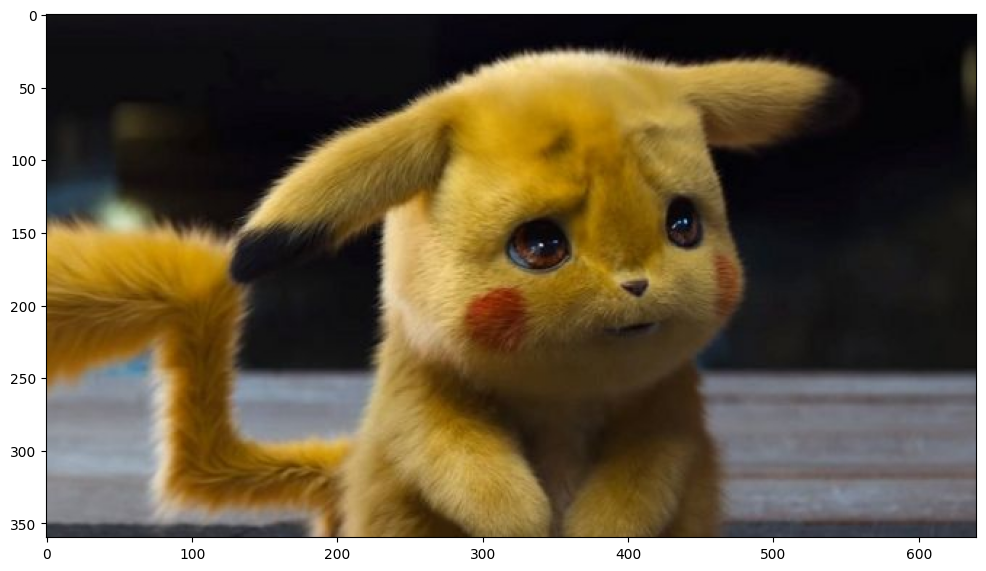

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(image/255)
plt.show()

In [20]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [21]:
image.shape

(1, 360, 640, 3)

## **Image Augmentation Layers**
- [**케라스 공식 문서 참고**](https://keras.io/api/layers/preprocessing_layers/)

In [22]:
import keras

In [23]:
aug_layers = [keras.layers.RandomRotation(factor=(-0.1,0.1)),
              keras.layers.RandomTranslation(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)),
              keras.layers.RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)),
            #   keras.layers.RandomFlip(mode='horizontal_and_vertical')
              ]

In [24]:
aug_layers

[<RandomRotation name=random_rotation_2, built=False>,
 <RandomTranslation name=random_translation_2, built=False>,
 <RandomZoom name=random_zoom_2, built=False>]

In [25]:
def image_augmentation(images) :
    for layer in aug_layers :
        images = layer(images)
        # print(images)
    return images

In [26]:
print(image_augmentation(image).shape)

(1, 360, 640, 3)


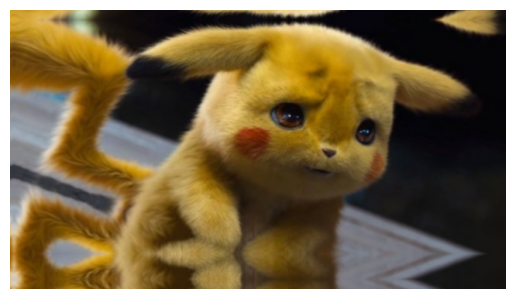

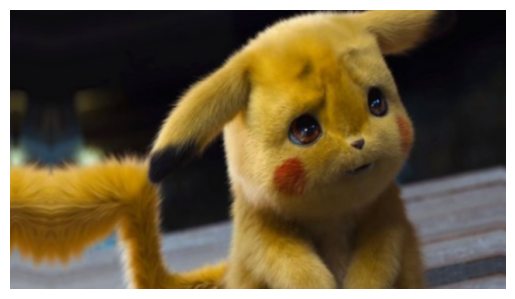

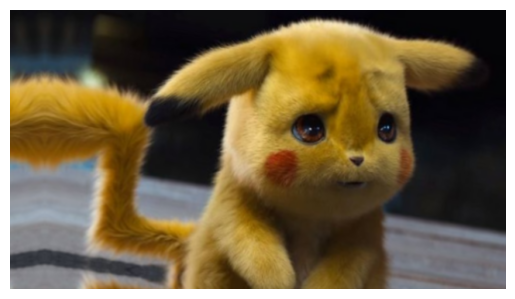

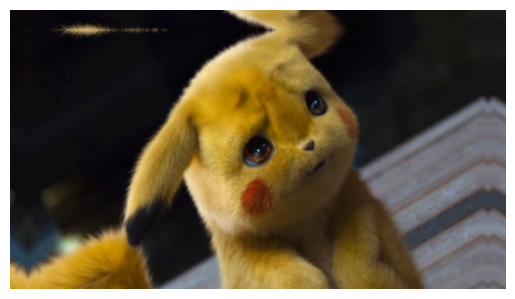

In [27]:
for i in range(4) :
    aug_imgs = image_augmentation(image)
    # temp = keras.preprocessing.image.array_to_img(aug_imgs)

    plt.imshow( aug_imgs[0]/255 )
    plt.axis('off')
    plt.show()